# Task 5: Exploratory Data Analysis - Sports

<B> Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’</B><br/>
● As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.<br/>
● Suggest teams or players a company should endorse for its products.<br/>


Tools- Python<br/>
<B><H3> AUTHOR- SAIYAM JAIN </B> 


<B>Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<B> Import the dataset

In [2]:
matches=pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

<B> Checking the null values

In [4]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [5]:
#Drop umpire3 column because it has a lot of null values
matches.drop(columns=['umpire3'],axis=1)
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
deliveries=pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

<B> Checking the columns available

In [8]:
matches.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [9]:
deliveries.columns.values

array(['match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs',
       'player_dismissed', 'dismissal_kind', 'fielder'], dtype=object)

<B> Creating the separate dataframe that will contains the details of winning team

In [10]:
winner_df=matches[['id','season','winner','player_of_match']]
winner_df

,id,season,winner,player_of_match
0,1,2017,Sunrisers Hyderabad,Yuvraj Singh
1,2,2017,Rising Pune Supergiant,SPD Smith
2,3,2017,Kolkata Knight Riders,CA Lynn
3,4,2017,Kings XI Punjab,GJ Maxwell
4,5,2017,Royal Challengers Bangalore,KM Jadhav
...,...,...,...,...
751,11347,2019,Mumbai Indians,HH Pandya
752,11412,2019,Mumbai Indians,AS Yadav
753,11413,2019,Delhi Capitals,RR Pant
754,11414,2019,Chennai Super Kings,F du Plessis


<B> Predicting that which team has won maximum seasons

/home/sam/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


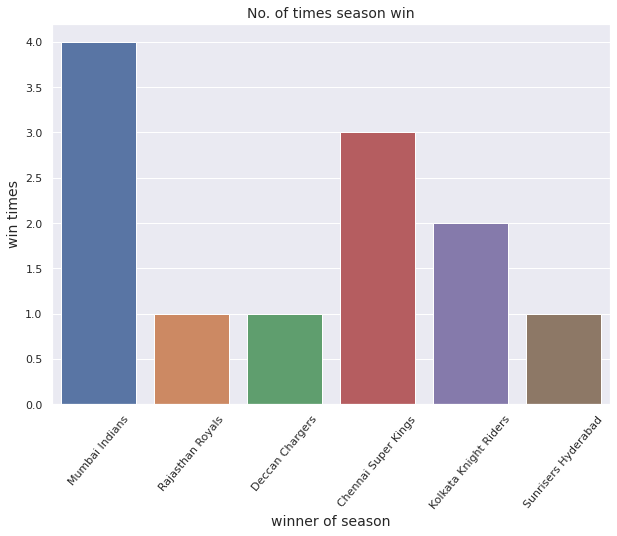

In [11]:
season_win = winner_df[['season','winner']]
season_win = season_win.drop_duplicates(subset=['season'],keep='last')
season_win.reset_index(drop=True).sort_values('season')
plt.figure(figsize=(10,7))
sns.countplot('winner',data=season_win)
plt.xlabel('winner of season',size=14)
plt.ylabel('win times',size=14)
plt.title('No. of times season win',size=14)
plt.xticks(rotation=50)
plt.show()

<B> Predicting the most time winner player of match

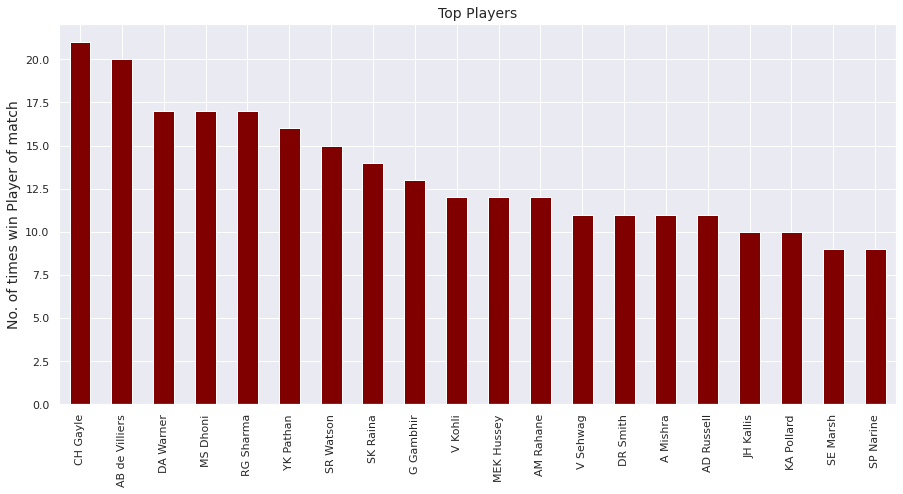

In [12]:
pom_df=winner_df[['id','player_of_match']]
POM = pom_df.player_of_match.value_counts()[:20]
plt.figure(figsize=(15,7))
POM.plot.bar(color='maroon')
plt.ylabel('No. of times win Player of match',size=14)
plt.title("Top Players",size=14)
plt.show()

<B> Which batsman has score maximum runs

In [13]:
batsman_score=deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index()
batsman_score=batsman_score.sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
batsman_score=batsman_score.iloc[:15]

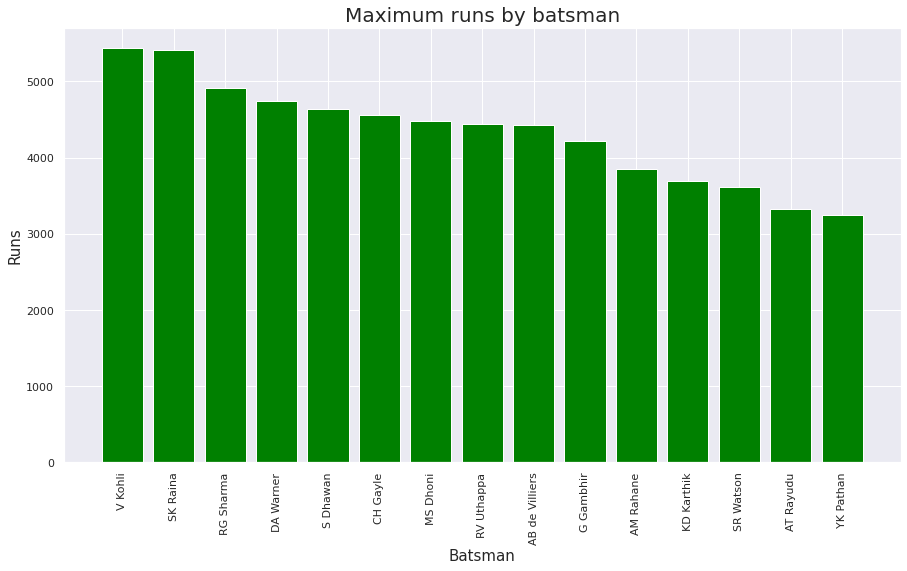

In [14]:
plt.figure(figsize=(15,8))
plt.bar(batsman_score['batsman'],batsman_score['batsman_runs'],color='Green')
plt.title("Maximum runs by batsman",fontsize=20)
plt.xlabel("Batsman",fontsize=15)
plt.ylabel("Runs",fontsize=15)
plt.xticks(rotation=90)
plt.show()

<B>Which baller has taken maximum wickets

In [15]:
baller=deliveries[['bowler','dismissal_kind']].dropna(axis=0).reset_index(drop=True)
baller = baller[~baller['dismissal_kind'].isin(['run out','retired hurt','lbw','obstructing the field'])]

In [16]:
baller_wicket=baller.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index()
baller_wicket=baller_wicket.sort_values('count',ascending=False).reset_index(drop=True)
baller_wicket=baller_wicket.iloc[:15]

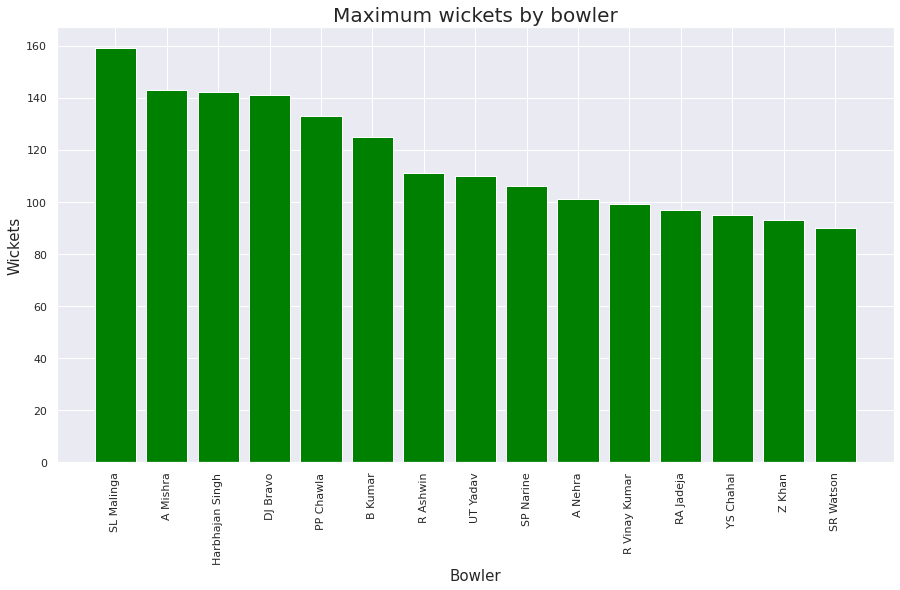

In [17]:
plt.figure(figsize=(15,8))
plt.bar(baller_wicket['bowler'],baller_wicket['count'],color='Green')
plt.title("Maximum wickets by bowler",fontsize=20)
plt.xlabel("Bowler",fontsize=15)
plt.ylabel("Wickets",fontsize=15)
plt.xticks(rotation=90)
plt.show()

# Factors contributing to win and loss of a team

In [18]:
toss=matches[['season','win_by_wickets','toss_decision']]

<ipython-input-19-2927ffb1a6f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toss['win_by']=np.where(toss['win_by_wickets']>0,'Bowl First','Bat First')


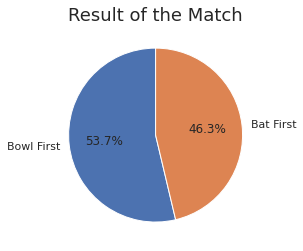

In [19]:
toss['win_by']=np.where(toss['win_by_wickets']>0,'Bowl First','Bat First')
wins = toss['win_by'].value_counts()
lb = np.array(wins.index)
plt.figure(figsize=(8,4))
plt.pie(wins,startangle=90,labels=lb,autopct='%1.1f%%')
plt.title("Result of the Match",fontsize=18)
plt.show()

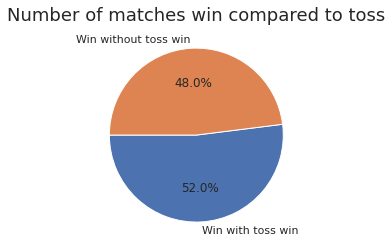

In [20]:
toss_win=matches[['toss_winner','toss_decision','winner']]
Toss_Win=toss_win['toss_winner']==toss_win['winner']
TW = Toss_Win.value_counts()
plt.figure(figsize = (8,4))
plt.pie(TW, labels=['Win with toss win','Win without toss win'],autopct='%1.1f%%',startangle=180)
plt.title("Number of matches win compared to toss",fontsize=18)
plt.show()

<B><h3> Boundaries

In [21]:
bd = deliveries[['batting_team','batsman_runs','batsman']]
bd['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [22]:
bound4 = bd[bd['batsman_runs']==4].groupby('batting_team')['batsman_runs'].agg([('Fours','count')])
boundary = bd[bd['batsman_runs']==6].groupby('batting_team')['batsman_runs'].agg([('Sixes','count')])
boundary = boundary.merge(bound4,how='inner',left_on='batting_team',right_on='batting_team')
boundary['total']=boundary['Sixes']+boundary['Fours']
boundary['batting_team']=['Chennai Super Kings','Deccan Chargers','Delhi Capitals','Delhi Daredevils',
                         'Gujarat Lions','Kings XI Punjab','Kochi Tuskers Kerala','Kolkata Knight Riders',
                         'Mumbai Indians','Pune Warriors','Rajasthan Royals','Rising Pune Supergiant',
                          'Rising Pune Supergiants','Royal Challengers Bangalore','Sunrisers Hyderabad']

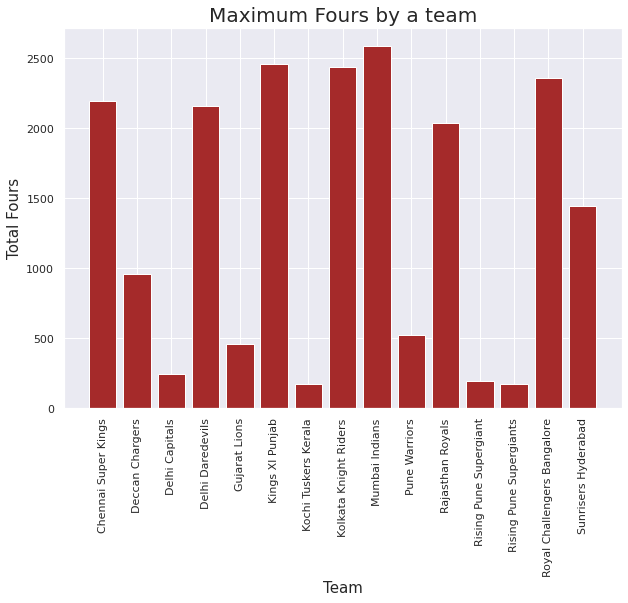

In [23]:
plt.figure(figsize=(10,7))
plt.bar(boundary['batting_team'],boundary['Fours'],color='brown')
plt.title("Maximum Fours by a team",fontsize=20)
plt.xlabel("Team",fontsize=15)
plt.ylabel("Total Fours",fontsize=15)
plt.xticks(rotation=90)
plt.show()

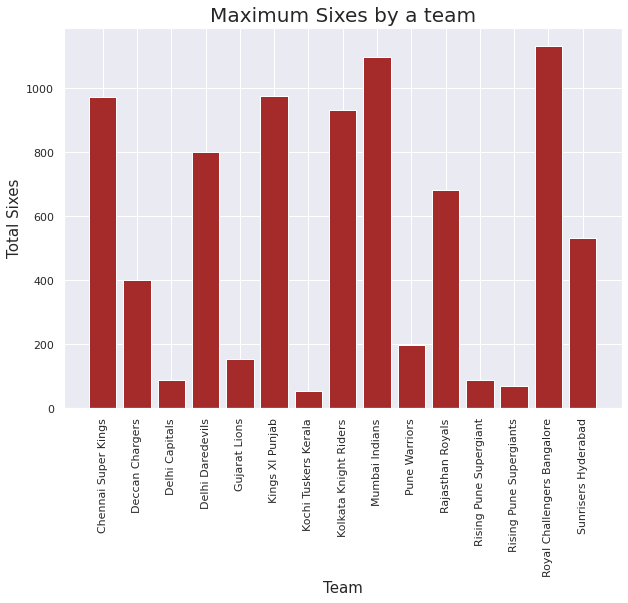

In [24]:
plt.figure(figsize=(10,7))
plt.bar(boundary['batting_team'],boundary['Sixes'],color='brown')
plt.title("Maximum Sixes by a team",fontsize=20)
plt.xlabel("Team",fontsize=15)
plt.ylabel("Total Sixes",fontsize=15)
plt.xticks(rotation=90)
plt.show()

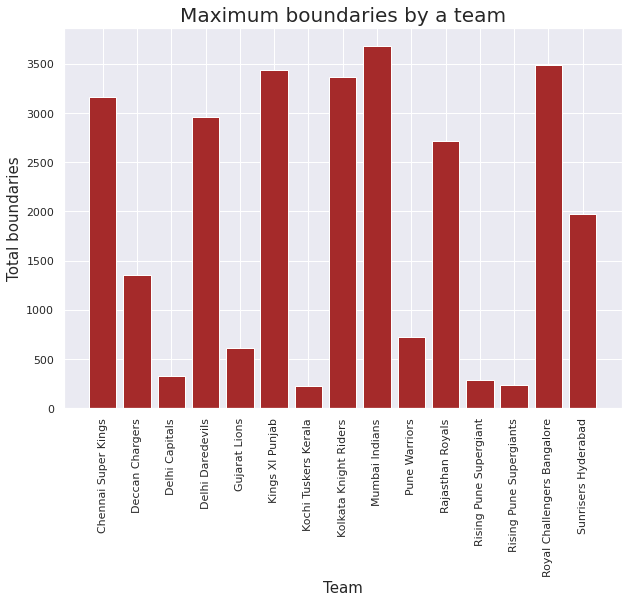

In [25]:
plt.figure(figsize=(10,7))
plt.bar(boundary['batting_team'],boundary['total'],color='brown')
plt.title("Maximum boundaries by a team",fontsize=20)
plt.xlabel("Team",fontsize=15)
plt.ylabel("Total boundaries",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [26]:
bound4_batsman = bd[bd['batsman_runs']==4].groupby('batsman')['batsman_runs'].agg([('Fours','count')])
bound4_batsman=bound4_batsman.sort_values('Fours',ascending=False)[:10]
bound4_batsman

,Fours
batsman,
S Dhawan,526
SK Raina,495
G Gambhir,492
V Kohli,482
DA Warner,459
RV Uthappa,436
RG Sharma,431
AM Rahane,405
CH Gayle,376


In [27]:
bound6_batsman = bd[bd['batsman_runs']==6].groupby('batsman')['batsman_runs'].agg([('Sixes','count')])
bound6_batsman=bound6_batsman.sort_values('Sixes',ascending=False)[:10]
bound6_batsman

,Sixes
batsman,
CH Gayle,327
AB de Villiers,214
MS Dhoni,207
SK Raina,195
RG Sharma,194
V Kohli,191
DA Warner,181
SR Watson,177
KA Pollard,175


# Conclusion 

<Li> Mumbai Indians has won the maximum number of seasons followed by Chennai Super Kings and Kolkata Knight Riders.
    <Li> CH Gayle has won maximum player of the match awards followed by AB de Villiers.
    <Li> V Kohli and SK Raina are maximum run scorer with having minute difference followed by RG Shama.
    <Li> SL Malinga has taken maximum number of wickets followed by A Mishra.
    <Li> Most of the teams win the match by doing bowling first.
    <Li> Mostly teams whose win the toss will win the match.
    <Li> Maximum number of fours are hit by Mumbai Indians followed by Kings XI Punjab.
    <Li> Maximum number of sixes are hit by Royal Challengers Bangalore followed by Mumbai Indians.
    <Li> Maximum number of boundaries are hit by Mumbai Indians followed by Royal Challengers Bangalore.
    <Li> Maximun number of fours are hit by S Dhawan.
    <Li> Maximun number of sixes are hit by CH Gayle.


# Find out the most successful teams, players and factors contributing win or loss of a team.

<Li><B> Successful Teams: </B> Mumbai Indians, Chennai Super Kings
<Li><B> Successful Players: </B> CH Gayle, V Kohli, S Dhawan.
<Li><B> Most of the teams win the match by doing bowling first.
<Li><B> Mostly teams whose win the toss will win the match

# Suggest teams or players a company should endorse for its products.

<Li> <B> Teams- </B> Mumbai Indians, Chennai Super Kings
<Li> <B> Players- </B> CH Gayle, V Kohli, SL Malinga